<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/MLInCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

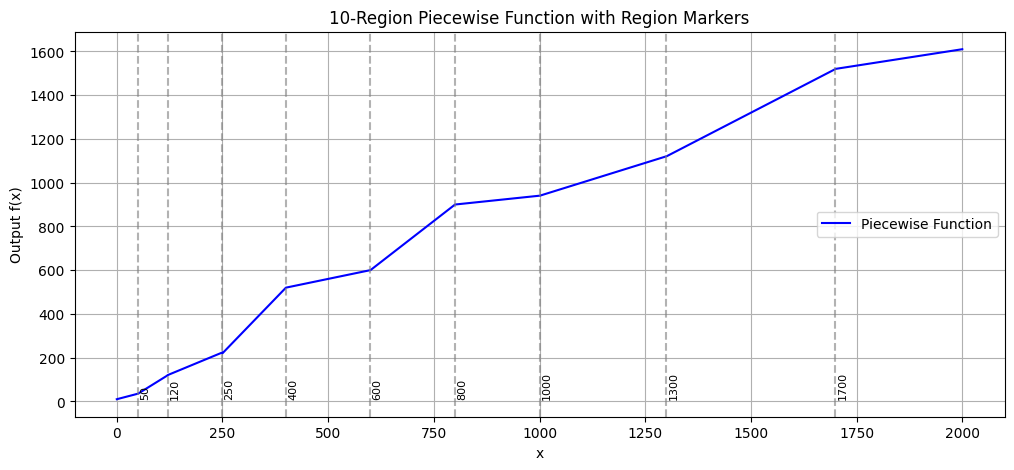

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 10-Region Piecewise Function
def piecewise_function(x):
    if x < 50:
        return 10 + 0.5 * x
    elif x < 120:
        return 35 + 1.2 * (x - 50)
    elif x < 250:
        return 120 + 0.8 * (x - 120)
    elif x < 400:
        return 220 + 2.0 * (x - 250)
    elif x < 600:
        return 520 + 0.4 * (x - 400)
    elif x < 800:
        return 600 + 1.5 * (x - 600)
    elif x < 1000:
        return 900 + 0.2 * (x - 800)
    elif x < 1300:
        return 940 + 0.6 * (x - 1000)
    elif x < 1700:
        return 1120 + 1.0 * (x - 1300)
    else:
        return 1520 + 0.3 * (x - 1700)

# Vectorized evaluation for plotting
x_values = np.linspace(0, 2000, 5000)
y_values = np.array([piecewise_function(x) for x in x_values])

# Region boundaries
region_boundaries = [50, 120, 250, 400, 600, 800, 1000, 1300, 1700]

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label='Piecewise Function', color='blue')

# Mark region boundaries
for boundary in region_boundaries:
    plt.axvline(boundary, color='gray', linestyle='--', alpha=0.6)
    plt.text(boundary + 5, min(y_values), f'{boundary}', rotation=90, verticalalignment='bottom', fontsize=8)

# Labels and Title
plt.xlabel('x')
plt.ylabel('Output f(x)')
plt.title('10-Region Piecewise Function with Region Markers')
plt.grid(True)
plt.legend()
plt.show()


Using device: cuda
Epoch 0: Loss=0.18483390
Epoch 1000: Loss=0.00109357
Epoch 2000: Loss=0.00050605
Epoch 3000: Loss=0.00029048
Epoch 4000: Loss=0.00024616
Epoch 5000: Loss=0.00024045
Epoch 6000: Loss=0.00021269
Epoch 7000: Loss=0.00018401
Epoch 8000: Loss=0.00013371
Epoch 9000: Loss=0.00010474
Epoch 10000: Loss=0.00008332
Epoch 11000: Loss=0.00006935
Epoch 12000: Loss=0.00005016
Epoch 13000: Loss=0.00003594
Epoch 14000: Loss=0.00002272
Epoch 15000: Loss=0.00001323
Epoch 16000: Loss=0.00000645
Epoch 17000: Loss=0.00000195
Epoch 18000: Loss=0.00000095
Epoch 19000: Loss=0.00000078
Epoch 20000: Loss=0.00000074
Epoch 21000: Loss=0.00000074
Epoch 22000: Loss=0.00000073
Epoch 23000: Loss=0.00000073
Epoch 24000: Loss=0.00000073
Epoch 25000: Loss=0.00000073
Epoch 26000: Loss=0.00000073
Epoch 27000: Loss=0.00000073
Epoch 28000: Loss=0.00000073
Epoch 29000: Loss=0.00000073
Epoch 30000: Loss=0.00000073
Epoch 31000: Loss=0.00000073
Epoch 32000: Loss=0.00000073
Epoch 33000: Loss=0.00000073
Epoch 34

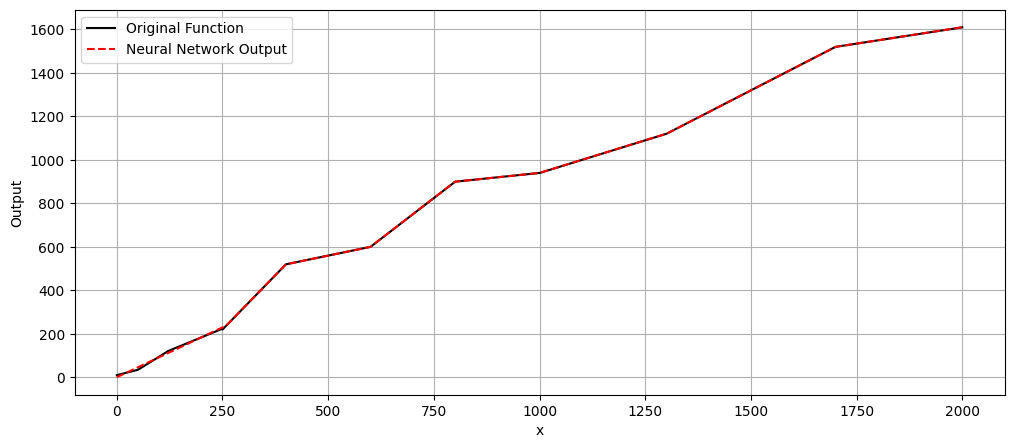

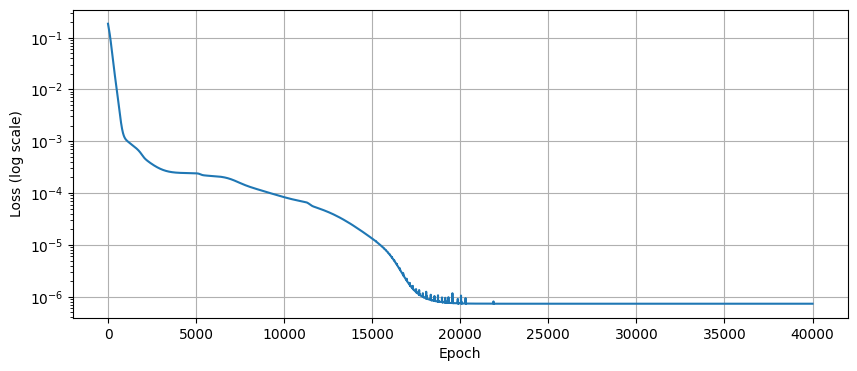

Rounded Output Accuracy: 0.0065
Model saved as 'fast_piecewise_nn.pth'


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Vectorized Piecewise Function
def piecewise_function_vectorized(x):
    y = torch.zeros_like(x)
    y = torch.where(x < 50, 10 + 0.5 * x, y)
    y = torch.where((x >= 50) & (x < 120), 35 + 1.2 * (x - 50), y)
    y = torch.where((x >= 120) & (x < 250), 120 + 0.8 * (x - 120), y)
    y = torch.where((x >= 250) & (x < 400), 220 + 2.0 * (x - 250), y)
    y = torch.where((x >= 400) & (x < 600), 520 + 0.4 * (x - 400), y)
    y = torch.where((x >= 600) & (x < 800), 600 + 1.5 * (x - 600), y)
    y = torch.where((x >= 800) & (x < 1000), 900 + 0.2 * (x - 800), y)
    y = torch.where((x >= 1000) & (x < 1300), 940 + 0.6 * (x - 1000), y)
    y = torch.where((x >= 1300) & (x < 1700), 1120 + 1.0 * (x - 1300), y)
    y = torch.where(x >= 1700, 1520 + 0.3 * (x - 1700), y)
    return y

# Data Generation
def generate_data(n_samples=2000):
    x = torch.linspace(0, 2000, n_samples).unsqueeze(1)
    y = piecewise_function_vectorized(x)
    return torch.round(x,decimals=2), torch.round(y, decimals=2)

# Neural Network
class SmallNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)

# Prepare Data
x_train, y_train = generate_data()
x_train_scaled = (x_train / 2000.0).to(device)
y_train_scaled = (y_train / y_train.max()).to(device)

# Model Setup
model = SmallNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=50, factor=0.5, verbose=True)
loss_fn = nn.SmoothL1Loss(beta=1.0)

# Training Loop (Full Batch Gradient Descent)
loss_history = []
for epoch in range(40000):
    optimizer.zero_grad()
    predictions_scaled = model(x_train_scaled)
    loss = loss_fn(predictions_scaled, y_train_scaled)
    loss.backward()
    optimizer.step()

    scheduler.step(loss)

    loss_history.append(loss.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.8f}")

# Inference
with torch.no_grad():
    predictions_scaled = model(x_train_scaled).cpu()
    predictions = torch.round(predictions_scaled * y_train.max(), decimals=2)

# Plot Results
plt.figure(figsize=(12, 5))
plt.plot(x_train.numpy(), y_train.numpy(), label='Original Function', color='black')
plt.plot(x_train.numpy(), predictions.numpy(), label='Neural Network Output', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.semilogy(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.grid(True)
plt.show()

# Accuracy
rounded_truth = torch.round(y_train)
accuracy = (predictions.squeeze() == rounded_truth.squeeze()).sum().item() / len(predictions)
print(f"Rounded Output Accuracy: {accuracy:.4f}")

# Save Model
torch.save(model.state_dict(), "fast_piecewise_nn.pth")
print("Model saved as 'fast_piecewise_nn.pth'")


#Scoring engine

In [ ]:
def compute_risk_score(age, income, active_days):
    score = 0

    if age < 25:
        score += 10
    else:
        score += 5

    if income > 50000:
        score += 15
    else:
        score += 8

    if active_days > 100:
        score += 12
    else:
        score += 6

    return score


Epoch 0: Loss=846.676697
Epoch 1000: Loss=84.928993
Epoch 2000: Loss=10.622058
Epoch 3000: Loss=6.488503
Epoch 4000: Loss=3.811817
Epoch 5000: Loss=1.626649
Epoch 6000: Loss=0.402108
Epoch 7000: Loss=0.040229
Epoch 8000: Loss=0.000883
Epoch 9000: Loss=0.000002
Epoch 10000: Loss=0.000000
Epoch 11000: Loss=0.000000
Epoch 12000: Loss=0.000000
Epoch 13000: Loss=0.000000
Epoch 14000: Loss=0.000000
Epoch 15000: Loss=0.000000
Epoch 16000: Loss=0.000000
Epoch 17000: Loss=0.000000
Epoch 18000: Loss=0.000000
Epoch 19000: Loss=0.000000

Rounded Accuracy (Exact Match): 1.0000
Tolerance Accuracy (±1): 1.0000


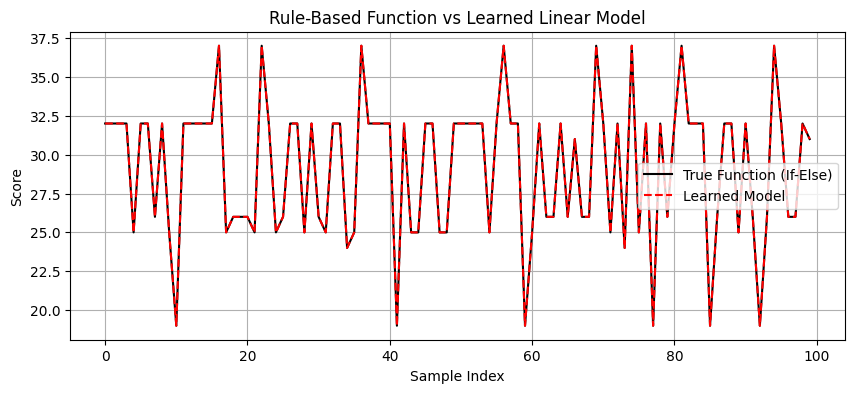

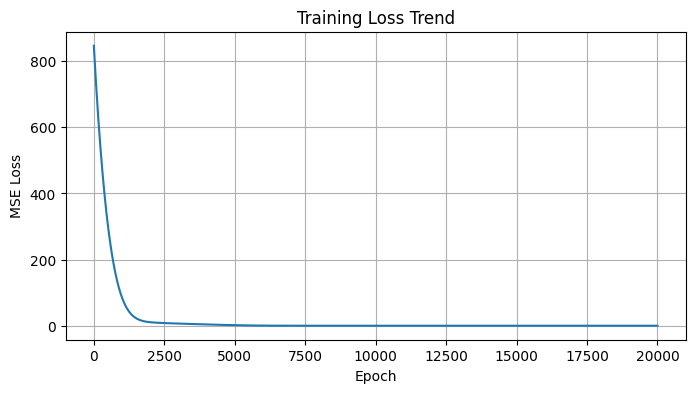


Learned Weights & Bias:
linear.weight: [4.9999995 7.        6.000001 ]
linear.bias: [19.]


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: Rule-Based If-Else Scoring Function
def compute_risk_score(x):
    scores = []
    for row in x:
        age, income, active_days = row.tolist()
        score = 0

        if age < 25:
            score += 10
        else:
            score += 5

        if income > 50000:
            score += 15
        else:
            score += 8

        if active_days > 100:
            score += 12
        else:
            score += 6

        scores.append(score)
    return torch.tensor(scores).float().unsqueeze(1)

# Step 2: Data Generation
def generate_data(n_samples=5000):
    torch.manual_seed(42)
    ages = torch.randint(18, 65, (n_samples, 1)).float()
    incomes = torch.randint(20000, 120000, (n_samples, 1)).float()
    active_days = torch.randint(0, 365, (n_samples, 1)).float()
    return torch.cat([ages, incomes, active_days], dim=1)

# Step 3: Model Definition (Simple Linear Layer)
class ScoringNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# Step 4: Prepare Training Data
x_train = generate_data(5000)
y_train = compute_risk_score(x_train)

# Binary condition inputs
x_binary = torch.cat([
    (x_train[:, 0] < 25).float().unsqueeze(1),
    (x_train[:, 1] > 50000).float().unsqueeze(1),
    (x_train[:, 2] > 100).float().unsqueeze(1)
], dim=1)

# Step 5: Training Setup
model = ScoringNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loss_history = []

# Step 6: Training Loop
for epoch in range(20000):
    optimizer.zero_grad()
    predictions = model(x_binary)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.6f}")

# Step 7: Evaluation on New Data
x_test = generate_data(100)
y_true = compute_risk_score(x_test)

x_test_binary = torch.cat([
    (x_test[:, 0] < 25).float().unsqueeze(1),
    (x_test[:, 1] > 50000).float().unsqueeze(1),
    (x_test[:, 2] > 100).float().unsqueeze(1)
], dim=1)

with torch.no_grad():
    y_learned = model(x_test_binary)

rounded_true = torch.round(y_true)
rounded_learned = torch.round(y_learned)

exact_match_accuracy = (rounded_true == rounded_learned).sum().item() / len(y_true)
tolerance_accuracy = (torch.abs(y_true - y_learned) <= 1.0).sum().item() / len(y_true)

print(f"\nRounded Accuracy (Exact Match): {exact_match_accuracy:.4f}")
print(f"Tolerance Accuracy (±1): {tolerance_accuracy:.4f}")

# Step 8: Plot Comparison
plt.figure(figsize=(10, 4))
plt.plot(y_true.numpy(), label='True Function (If-Else)', color='black')
plt.plot(y_learned.numpy(), label='Learned Model', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Rule-Based Function vs Learned Linear Model')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Trend")
plt.grid(True)
plt.show()

# Step 10: View Learned Parameters
print("\nLearned Weights & Bias:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy().flatten()}")


Epoch 0: Loss=1408.097168
Epoch 1000: Loss=122.559074
Epoch 2000: Loss=56.244656
Epoch 3000: Loss=21.806883
Epoch 4000: Loss=5.636455
Epoch 5000: Loss=0.634330
Epoch 6000: Loss=0.017064
Epoch 7000: Loss=0.000041

Tolerance Accuracy (±1): 1.0000


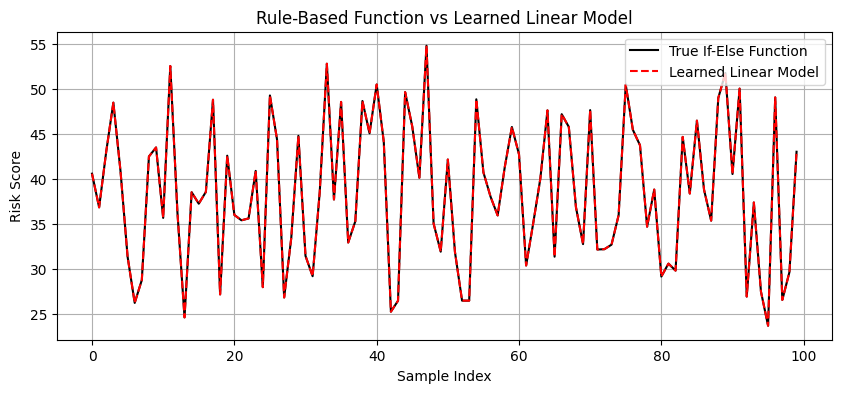

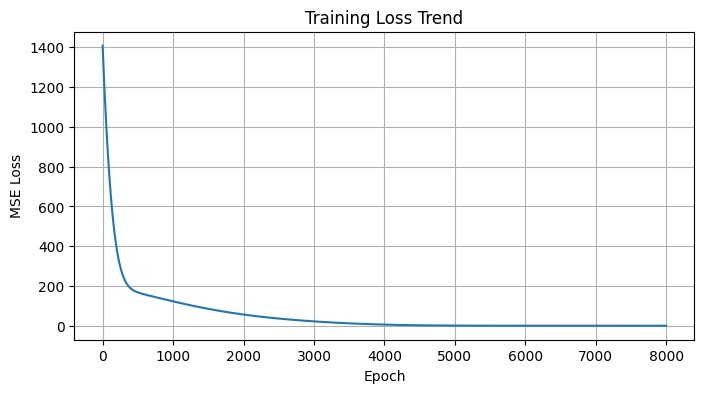


Learned Weights and Bias:
linear.weight: [-19.999722  -24.999922   -2.9999356]
linear.bias: [59.999798]


In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: Rule-Based If-Else Function
def compute_risk_score_ifelse(x):
    scores = []
    for row in x:
        age, monthly_spend, active_days = row.tolist()
        score = 60.0
        if age >= 0:
            score += (-0.2) * age
        if monthly_spend >= 0:
            score += (-0.0005) * monthly_spend
        if active_days >= 0:
            score += (-0.1) * active_days
        scores.append(score)
    return torch.tensor(scores).float().unsqueeze(1)

# Step 2: Data Generation
def generate_customer_data(n_samples=5000):
    torch.manual_seed(42)
    ages = torch.randint(18, 70, (n_samples, 1)).float()
    monthly_spend = torch.randint(1000, 50000, (n_samples, 1)).float()
    active_days = torch.randint(0, 30, (n_samples, 1)).float()
    features = torch.cat([ages, monthly_spend, active_days], dim=1)
    return features

# Step 3: Linear Model
class LinearRiskModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# Step 4: Training Setup
x_train = generate_customer_data(5000)
y_train = compute_risk_score_ifelse(x_train)

scaling_factors = torch.tensor([100.0, 50000.0, 30.0])
x_train_scaled = x_train / scaling_factors

model = LinearRiskModel()
optimizer = optim.Adam(model.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
loss_history = []

# Step 5: Training Loop
for epoch in range(8000):
    optimizer.zero_grad()
    predictions = model(x_train_scaled)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.6f}")

# Step 6: Evaluation
x_test = generate_customer_data(100)
y_true = compute_risk_score_ifelse(x_test)
x_test_scaled = x_test / scaling_factors

with torch.no_grad():
    y_pred = model(x_test_scaled)

tolerance_accuracy = (torch.abs(y_true - y_pred) <= 1.0).sum().item() / len(y_true)
print(f"\nTolerance Accuracy (±1): {tolerance_accuracy:.4f}")

# Step 7: Plotting
plt.figure(figsize=(10, 4))
plt.plot(y_true.numpy(), label='True If-Else Function', color='black')
plt.plot(y_pred.numpy(), label='Learned Linear Model', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Risk Score')
plt.title('Rule-Based Function vs Learned Linear Model')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Trend")
plt.grid(True)
plt.show()

# Step 9: Display Learned Weights
print("\nLearned Weights and Bias:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy().flatten()}")


Epoch 0: Loss=8414.798828
Epoch 2000: Loss=1100.466431
Epoch 4000: Loss=702.877991
Epoch 6000: Loss=460.780457
Epoch 8000: Loss=249.576370
Epoch 10000: Loss=115.015152
Epoch 12000: Loss=39.933205
Epoch 14000: Loss=7.000788
Epoch 16000: Loss=0.178770
Epoch 18000: Loss=0.000012
Epoch 20000: Loss=0.000000
Epoch 22000: Loss=0.000000
Epoch 24000: Loss=0.000000

Tolerance Accuracy (±1): 1.0000


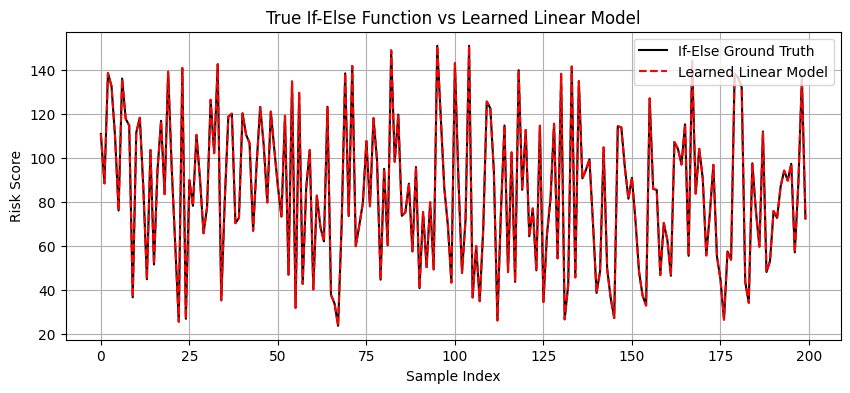

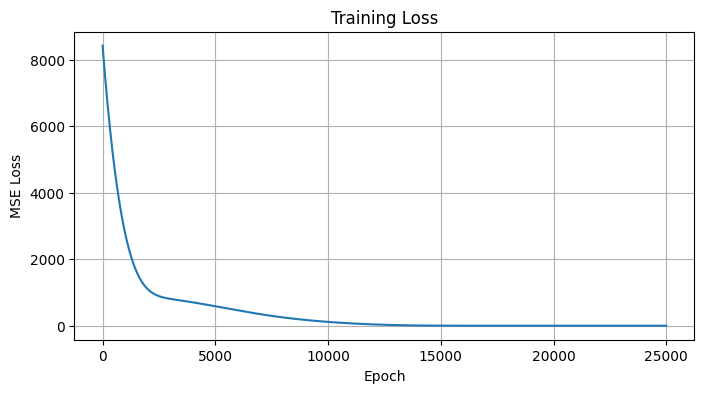


Learned Weights & Bias:
linear.weight: [ 12.         15.         14.6       110.         17.5        -3.6000001
  -7.5       -10.       ]
linear.bias: [10.]


In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: If-Else True Function
def compute_complex_risk_score(age, income, active_days, purchases, visits, churn_days, complaints, support_calls):
    score = 10.0
    score += 0.12 * age
    score += 0.00015 * income
    score += 0.04 * active_days
    score += 0.55 * purchases
    score += 0.35 * visits
    score -= 0.02 * churn_days
    score -= 1.5 * complaints
    score -= 0.5 * support_calls
    return score

def compute_risk_scores_batch(features):
    results = []
    for row in features:
        age, income, active_days, purchases, visits, churn_days, complaints, support_calls = row.tolist()
        score = compute_complex_risk_score(age, income, active_days, purchases, visits, churn_days, complaints, support_calls)
        results.append(score)
    return torch.tensor(results).unsqueeze(1)

# Step 2: Data Generation
def generate_data(n_samples=5000):
    torch.manual_seed(42)
    ages = torch.randint(18, 65, (n_samples, 1)).float()
    incomes = torch.randint(20000, 120000, (n_samples, 1)).float()
    active_days = torch.randint(0, 365, (n_samples, 1)).float()
    purchases = torch.randint(0, 200, (n_samples, 1)).float()
    visits = torch.randint(1, 50, (n_samples, 1)).float()
    churn_days = torch.randint(0, 180, (n_samples, 1)).float()
    complaints = torch.randint(0, 5, (n_samples, 1)).float()
    support_calls = torch.randint(0, 20, (n_samples, 1)).float()

    features = torch.cat([ages, incomes, active_days, purchases, visits, churn_days, complaints, support_calls], dim=1)
    scores = compute_risk_scores_batch(features)
    return features, scores

# Step 3: Linear Model
class ComplexLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(8, 1)
    def forward(self, x):
        return self.linear(x)

# Step 4: Training
features, targets = generate_data(5000)
scaling_factors = torch.tensor([100.0, 100000.0, 365.0, 200.0, 50.0, 180.0, 5.0, 20.0])
features_scaled = features / scaling_factors

model = ComplexLinearModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

loss_history = []
for epoch in range(25000):
    optimizer.zero_grad()
    predictions = model(features_scaled)
    loss = loss_fn(predictions, targets)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.6f}")

# Step 5: Evaluation
x_test, y_true = generate_data(200)
x_test_scaled = x_test / scaling_factors
with torch.no_grad():
    y_pred = model(x_test_scaled)

tolerance_accuracy = (torch.abs(y_true - y_pred) <= 1.0).sum().item() / len(y_true)
print(f"\nTolerance Accuracy (±1): {tolerance_accuracy:.4f}")

# Step 6: Plotting
plt.figure(figsize=(10, 4))
plt.plot(y_true.numpy(), label='If-Else Ground Truth', color='black')
plt.plot(y_pred.numpy(), label='Learned Linear Model', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Risk Score')
plt.title('True If-Else Function vs Learned Linear Model')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# Step 7: Weights
print("\nLearned Weights & Bias:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy().flatten()}")
